In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2

C:\Users\samke\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
inputPath = "\Train"

In [ ]:
example = cv2.imread(inputPath + "\1.jpg")

In [ ]:
cv2.imshow('test',example)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import os
import cv2

# Directory containing the images
directory = 'Train/'

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the file is an image (you might want to add more sophisticated checks)
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full file path
        filepath = os.path.join(directory, filename)
        
        # Load the image using OpenCV
        img = cv2.imread(filepath)
        
        # Check if the image was loaded successfully
        if img is not None:
            # Display the image (you can replace this with any processing you want to do)
            cv2.imshow(filename, img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print(f"Error loading image: {filepath}")


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory containing the images
directory = 'Train/'

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the file is an image (you might want to add more sophisticated checks)
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full file path
        filepath = os.path.join(directory, filename)
        
        # Load the image using Matplotlib
        img = mpimg.imread(filepath)
        
        # Display the image
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory containing the images
directory = 'Train/'

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the file is an image (you might want to add more sophisticated checks)
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full file path
        filepath = os.path.join(directory, filename)
        
        # Load the image using Matplotlib
        img = mpimg.imread(filepath)
        
        # Extract photo number from filename
        photo_number = os.path.splitext(filename)[0]
        
        # Display the image with title
        plt.imshow(img)
        plt.title(photo_number)
        plt.axis('off')  # Hide axes
        plt.show()


In [2]:
df = pd.read_csv('train.csv')

In [ ]:
df

In [ ]:
df['Price'].max()

In [3]:
import seaborn as sns


In [ ]:
#!pip install folium


In [ ]:
#!pip install geopy


In [4]:
import folium
import pandas as pd
import requests



# Create a map centered at a specific location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=4)

# Function to get location name using OpenStreetMap Nominatim API


# Add markers for each row in the dataframe
for index, row in df.iterrows():

    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(m)

# Display the map
m


In [5]:
def get_state_name(lat, lon):
    url = f"https://nominatim.openstreetmap.org/reverse?format=json&lat={lat}&lon={lon}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data.get('address', {}).get('state', 'Unknown')
    else:
        return 'Unknown'

# Add state names to the dataframe
df['State'] = df.apply(lambda row: get_state_name(row['Latitude'], row['Longitude']), axis=1)

# Display the updated dataframe
print(df)

     House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude    Price  \
0           1         4        4.0  4053   33.6968  -111.8892   869500   
1           2         4        3.0  3343   34.8280  -119.0349   865200   
2           3         3        4.0  3923   33.7669  -111.9182   889000   
3           4         5        5.0  4022   33.7752  -111.7791   910000   
4           5         3        4.0  4116   33.7669  -111.9182   971226   
..        ...       ...        ...   ...       ...        ...      ...   
495       496         2        2.0  1257   35.6406  -120.7003   380000   
496       497         4        2.0  2072   35.6406  -120.7003   429900   
497       498         2        2.0  2213   35.6406  -120.7003   585000   
498       499         3        2.5  1500   35.6406  -120.7003   319000   
499       500         4        4.0  3000   35.6406  -120.7003  1495000   

          State  
0       Arizona  
1    California  
2       Arizona  
3       Arizona  
4       Arizona  
.. 

In [ ]:
df

In [ ]:
average_prices = df.groupby('State')['Price'].mean()

# Display the average prices per state
print(average_prices)

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('State')['Price'].apply(lambda x: x.reset_index(drop=True).plot(kind='bar', ax=plt.gca(), color='blue', alpha=0.5))
plt.title('Prices per State')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(df['State'].unique())
plt.tight_layout()
plt.show()

In [ ]:
df

In [6]:
from sklearn.preprocessing import LabelEncoder


In [7]:
label_encoder = LabelEncoder()

# Fit and transform the 'State' column
df['State_Code'] = label_encoder.fit_transform(df['State'])

# Display the updated dataframe
print(df)

     House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude    Price  \
0           1         4        4.0  4053   33.6968  -111.8892   869500   
1           2         4        3.0  3343   34.8280  -119.0349   865200   
2           3         3        4.0  3923   33.7669  -111.9182   889000   
3           4         5        5.0  4022   33.7752  -111.7791   910000   
4           5         3        4.0  4116   33.7669  -111.9182   971226   
..        ...       ...        ...   ...       ...        ...      ...   
495       496         2        2.0  1257   35.6406  -120.7003   380000   
496       497         4        2.0  2072   35.6406  -120.7003   429900   
497       498         2        2.0  2213   35.6406  -120.7003   585000   
498       499         3        2.5  1500   35.6406  -120.7003   319000   
499       500         4        4.0  3000   35.6406  -120.7003  1495000   

          State  State_Code  
0       Arizona           0  
1    California           1  
2       Arizona      

In [8]:
X= df.drop(columns=['Price','State'])
y= df['Price']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model3 = keras.models.Sequential([
keras.layers.Dense(512, activation='relu'),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dense(128, activation='relu'), 
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(32, activation='relu'),
keras.layers.Dense(1)]
)
model3.compile(optimizer='adam', loss='mape')
test3= model3.fit(X_train, y_train, epochs=600, validation_split=0.2)




Epoch 1/600

10/10 [==============================] - 1s 30ms/step - loss: 99.5859 - val_loss: 98.4880
Epoch 2/600
10/10 [==============================] - 0s 9ms/step - loss: 94.8411 - val_loss: 85.4746
Epoch 3/600
10/10 [==============================] - 0s 9ms/step - loss: 67.5638 - val_loss: 57.0045
Epoch 4/600
10/10 [==============================] - 0s 11ms/step - loss: 60.2164 - val_loss: 56.7885
Epoch 5/600
10/10 [==============================] - 0s 8ms/step - loss: 57.0530 - val_loss: 57.8768
Epoch 6/600
10/10 [==============================] - 0s 8ms/step - loss: 56.6011 - val_loss: 55.4388
Epoch 7/600
10/10 [==============================] - 0s 7ms/step - loss: 55.2631 - val_loss: 55.1124
Epoch 8/600
10/10 [==============================] - 0s 8ms/step - loss: 54.1296 - val_loss: 53.9180
Epoch 9/600
10/10 [==============================] - 0s 8ms/step - loss: 54.1765 - val_loss: 53.5832
Epoch 10/600
10/10 [==============================] - 0s 8ms/step - loss: 51.8104 - va

10/10 [==============================] - 0s 8ms/step - loss: 44.8424 - val_loss: 46.2790
Epoch 76/600
10/10 [==============================] - 0s 8ms/step - loss: 44.7005 - val_loss: 45.9760
Epoch 77/600
10/10 [==============================] - 0s 7ms/step - loss: 44.7872 - val_loss: 46.0632
Epoch 78/600
10/10 [==============================] - 0s 9ms/step - loss: 44.4972 - val_loss: 46.5846
Epoch 79/600
10/10 [==============================] - 0s 8ms/step - loss: 44.6089 - val_loss: 45.8391
Epoch 80/600
10/10 [==============================] - 0s 8ms/step - loss: 44.9788 - val_loss: 46.2430
Epoch 81/600
10/10 [==============================] - 0s 7ms/step - loss: 45.0457 - val_loss: 46.5205
Epoch 82/600
10/10 [==============================] - 0s 7ms/step - loss: 44.6043 - val_loss: 46.7979
Epoch 83/600
10/10 [==============================] - 0s 8ms/step - loss: 44.9342 - val_loss: 45.6602
Epoch 84/600
10/10 [==============================] - 0s 7ms/step - loss: 45.0264 - val_loss: 4

Epoch 155/600
10/10 [==============================] - 0s 9ms/step - loss: 44.4010 - val_loss: 46.2745
Epoch 156/600
10/10 [==============================] - 0s 8ms/step - loss: 44.5926 - val_loss: 45.6757
Epoch 157/600
10/10 [==============================] - 0s 9ms/step - loss: 44.6571 - val_loss: 45.9783
Epoch 158/600
10/10 [==============================] - 0s 9ms/step - loss: 44.4185 - val_loss: 46.3774
Epoch 159/600
10/10 [==============================] - 0s 9ms/step - loss: 44.5276 - val_loss: 46.1086
Epoch 160/600
10/10 [==============================] - 0s 9ms/step - loss: 44.3439 - val_loss: 46.2313
Epoch 161/600
10/10 [==============================] - 0s 9ms/step - loss: 44.5826 - val_loss: 45.8123
Epoch 162/600
10/10 [==============================] - 0s 9ms/step - loss: 44.5360 - val_loss: 46.6658
Epoch 163/600
10/10 [==============================] - 0s 8ms/step - loss: 44.4018 - val_loss: 46.2745
Epoch 164/600
10/10 [==============================] - 0s 8ms/step - loss

10/10 [==============================] - 0s 8ms/step - loss: 42.9966 - val_loss: 45.7678
Epoch 235/600
10/10 [==============================] - 0s 8ms/step - loss: 42.9049 - val_loss: 46.3281
Epoch 236/600
10/10 [==============================] - 0s 8ms/step - loss: 43.2101 - val_loss: 45.3514
Epoch 237/600
10/10 [==============================] - 0s 8ms/step - loss: 42.4770 - val_loss: 47.3025
Epoch 238/600
10/10 [==============================] - 0s 10ms/step - loss: 42.6875 - val_loss: 45.6732
Epoch 239/600
10/10 [==============================] - 0s 8ms/step - loss: 42.6600 - val_loss: 45.3934
Epoch 240/600
10/10 [==============================] - 0s 9ms/step - loss: 42.4701 - val_loss: 46.1897
Epoch 241/600
10/10 [==============================] - 0s 8ms/step - loss: 42.6821 - val_loss: 46.0280
Epoch 242/600
10/10 [==============================] - 0s 9ms/step - loss: 42.8546 - val_loss: 45.5941
Epoch 243/600
10/10 [==============================] - 0s 8ms/step - loss: 42.8229 - v

10/10 [==============================] - 0s 8ms/step - loss: 39.1183 - val_loss: 45.5481
Epoch 314/600
10/10 [==============================] - 0s 8ms/step - loss: 39.5225 - val_loss: 46.2624
Epoch 315/600
10/10 [==============================] - 0s 8ms/step - loss: 39.3773 - val_loss: 46.0311
Epoch 316/600
10/10 [==============================] - 0s 8ms/step - loss: 38.7498 - val_loss: 44.9561
Epoch 317/600
10/10 [==============================] - 0s 8ms/step - loss: 38.7300 - val_loss: 45.3000
Epoch 318/600
10/10 [==============================] - 0s 11ms/step - loss: 38.8602 - val_loss: 45.5750
Epoch 319/600
10/10 [==============================] - 0s 10ms/step - loss: 39.1197 - val_loss: 45.6834
Epoch 320/600
10/10 [==============================] - 0s 9ms/step - loss: 38.8286 - val_loss: 45.0826
Epoch 321/600
10/10 [==============================] - 0s 12ms/step - loss: 38.6977 - val_loss: 45.3756
Epoch 322/600
10/10 [==============================] - 0s 10ms/step - loss: 38.8286 

10/10 [==============================] - 0s 9ms/step - loss: 37.2176 - val_loss: 45.7855
Epoch 393/600
10/10 [==============================] - 0s 11ms/step - loss: 38.3161 - val_loss: 45.0284
Epoch 394/600
10/10 [==============================] - 0s 12ms/step - loss: 39.7523 - val_loss: 43.4264
Epoch 395/600
10/10 [==============================] - 0s 9ms/step - loss: 41.8264 - val_loss: 51.9749
Epoch 396/600
10/10 [==============================] - 0s 9ms/step - loss: 40.3208 - val_loss: 44.7799
Epoch 397/600
10/10 [==============================] - 0s 9ms/step - loss: 38.2265 - val_loss: 44.4365
Epoch 398/600
10/10 [==============================] - 0s 9ms/step - loss: 38.7743 - val_loss: 45.6202
Epoch 399/600
10/10 [==============================] - 0s 9ms/step - loss: 38.2232 - val_loss: 43.5065
Epoch 400/600
10/10 [==============================] - 0s 8ms/step - loss: 37.2131 - val_loss: 43.6921
Epoch 401/600
10/10 [==============================] - 0s 12ms/step - loss: 36.5728 -

10/10 [==============================] - 0s 9ms/step - loss: 33.4093 - val_loss: 39.7556
Epoch 472/600
10/10 [==============================] - 0s 9ms/step - loss: 33.9340 - val_loss: 40.2714
Epoch 473/600
10/10 [==============================] - 0s 9ms/step - loss: 36.0666 - val_loss: 38.9034
Epoch 474/600
10/10 [==============================] - 0s 8ms/step - loss: 34.7610 - val_loss: 42.4412
Epoch 475/600
10/10 [==============================] - 0s 8ms/step - loss: 36.1876 - val_loss: 43.2880
Epoch 476/600
10/10 [==============================] - 0s 8ms/step - loss: 35.5190 - val_loss: 40.0241
Epoch 477/600
10/10 [==============================] - 0s 9ms/step - loss: 36.8030 - val_loss: 39.9711
Epoch 478/600
10/10 [==============================] - 0s 8ms/step - loss: 33.4541 - val_loss: 39.9081
Epoch 479/600
10/10 [==============================] - 0s 9ms/step - loss: 33.6182 - val_loss: 39.3057
Epoch 480/600
10/10 [==============================] - 0s 9ms/step - loss: 33.1322 - va

10/10 [==============================] - 0s 8ms/step - loss: 32.1744 - val_loss: 39.9488
Epoch 551/600
10/10 [==============================] - 0s 8ms/step - loss: 32.7410 - val_loss: 41.4028
Epoch 552/600
10/10 [==============================] - 0s 8ms/step - loss: 34.3427 - val_loss: 43.6951
Epoch 553/600
10/10 [==============================] - 0s 8ms/step - loss: 34.7766 - val_loss: 43.3806
Epoch 554/600
10/10 [==============================] - 0s 8ms/step - loss: 34.4907 - val_loss: 39.4956
Epoch 555/600
10/10 [==============================] - 0s 8ms/step - loss: 33.9046 - val_loss: 40.0628
Epoch 556/600
10/10 [==============================] - 0s 9ms/step - loss: 32.3560 - val_loss: 40.0143
Epoch 557/600
10/10 [==============================] - 0s 8ms/step - loss: 32.7502 - val_loss: 39.3337
Epoch 558/600
10/10 [==============================] - 0s 8ms/step - loss: 32.0317 - val_loss: 39.0652
Epoch 559/600
10/10 [==============================] - 0s 9ms/step - loss: 32.6636 - va

In [ ]:
model3.evaluate(X_test,y_test)


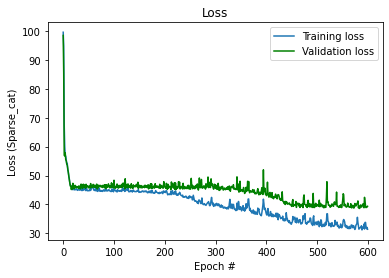

In [14]:
plt.plot(test3.history['loss'], label='Training loss')
plt.plot(test3.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (Sparse_cat)')
plt.title('Loss')
plt.legend()


In [54]:
Test= pd.read_csv('Test.csv')

In [55]:
Test['State'] = Test.apply(lambda row: get_state_name(row['Latitude'], row['Longitude']), axis=1)
label_encoder2 = LabelEncoder()

# Fit and transform the 'State' column
Test['State_Code'] = label_encoder2.fit_transform(Test['State'])

# Display the updated dataframe
print(df)

     House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude    Price  \
0           1         4        4.0  4053   33.6968  -111.8892   869500   
1           2         4        3.0  3343   34.8280  -119.0349   865200   
2           3         3        4.0  3923   33.7669  -111.9182   889000   
3           4         5        5.0  4022   33.7752  -111.7791   910000   
4           5         3        4.0  4116   33.7669  -111.9182   971226   
..        ...       ...        ...   ...       ...        ...      ...   
495       496         2        2.0  1257   35.6406  -120.7003   380000   
496       497         4        2.0  2072   35.6406  -120.7003   429900   
497       498         2        2.0  2213   35.6406  -120.7003   585000   
498       499         3        2.5  1500   35.6406  -120.7003   319000   
499       500         4        4.0  3000   35.6406  -120.7003  1495000   

          State  State_Code  
0       Arizona           0  
1    California           1  
2       Arizona      

In [57]:
predict_df2= Test.drop(columns=['State'])

In [76]:
predict_df2

House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude  State_Code
0        501         3        2.0  2330   35.6406  -120.7003           0
1        502         3        2.5  1339   35.6406  -120.7003           0
2        503         3        2.0  1472   35.6406  -120.7003           0
3        504         4        4.0  2681   35.6406  -120.7003           0
4        505         3        2.5  1935   33.8085  -117.9228           0
5        506         3        2.0  1471   33.8085  -117.9228           0
6        507         3        2.0  1248   33.8085  -117.9228           0
7        508         3        1.5  1214   33.8085  -117.9228           0
8        509         4        3.0  1882   33.8085  -117.9228           0
9        510         2        2.5   987   33.8085  -117.9228           0
10       511         4        3.0  1606   33.8085  -117.9228           0
11       512         3        2.5  1554   33.8085  -117.9228           0
12       513         3        2.5  1717   33.8085  -117.9228           0
13       514         4        2.0  1475   37.9658  -121.7758           0
14       515         3        2.0  1052   37.9658  -121.7758           0
15       516         4        3.0  2353   37.9658  -121.7758           0
16       517         4        2.5  2422   37.9658  -121.7758           0
17       518         3        2.5  2650   37.9658  -121.7758           0
18       519         4        2.5  1831   37.9658  -121.7758           0
19       520         4        2.0  2334   37.9658  -121.7758           0
20       521         5        3.0  2179   37.9658  -121.7758           0
21       522         4        2.5  1662   37.9658  -121.7758           0
22       523         4        3.0  1765   37.9658  -121.7758           0
23       524         3        2.0  2012   37.9658  -121.7758           0
24       525         7        4.0  3871   37.9658  -121.7758           0
25       526         5        3.0  3679   37.9658  -121.7758           0
26       527         4        2.5  1794   37.9658  -121.7758           0
27       528         4        3.5  3420   37.9658  -121.7758           0
28       529         4        3.0  2506   37.9658  -121.7758           0
29       530         4        2.5  2236   37.9658  -121.7758           0
30       531         5        2.0  2066   37.9658  -121.7758           0
31       532         4        3.5  9536   37.9658  -121.7758           0
32       533         3        2.0  2014   37.9658  -121.7758           0
33       534         4        3.0  2312   37.9658  -121.7758           0
34       535         5        3.0  3796   37.9658  -121.7758           0

In [53]:
min_values = scaler.data_min_
max_values = scaler.data_max_


In [115]:


X_test_scaled = (predict_df2 - min_values) / (max_values - min_values)


In [190]:
predict = model5.predict(second_df)

2/2 [==============================] - 0s 3ms/step


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2

C:\Users\samke\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.33333333, 0.5       , ..., 0.07026906, 0.30389706,
        0.        ],
       [0.00200401, 0.33333333, 0.33333333, ..., 0.144885  , 0.09666961,
        0.25      ],
       [0.00400802, 0.22222222, 0.5       , ..., 0.07489298, 0.30305605,
        0.        ],
       ...,
       [0.99599198, 0.11111111, 0.16666667, ..., 0.19848552, 0.0483725 ,
        0.25      ],
       [0.99799599, 0.22222222, 0.25      , ..., 0.19848552, 0.0483725 ,
        0.25      ],
       [1.        , 0.33333333, 0.5       , ..., 0.19848552, 0.0483725 ,
        0.25      ]])

In [50]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
model4 = keras.models.Sequential([
keras.layers.Dense(512, activation='relu'),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dense(128, activation='relu'), 
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(32, activation='linear'),
keras.layers.Dense(1)]
)
model4.compile(optimizer='adam', loss='mape')
test4= model4.fit(X_train, y_train, epochs=300, validation_split=0.2)


Epoch 1/300
10/10 [==============================] - 1s 25ms/step - loss: 99.0965 - val_loss: 96.5336
Epoch 2/300
10/10 [==============================] - 0s 8ms/step - loss: 85.8202 - val_loss: 64.4019
Epoch 3/300
10/10 [==============================] - 0s 8ms/step - loss: 62.2806 - val_loss: 58.0656
Epoch 4/300
10/10 [==============================] - 0s 8ms/step - loss: 56.8057 - val_loss: 57.7336
Epoch 5/300
10/10 [==============================] - 0s 8ms/step - loss: 56.2829 - val_loss: 54.7554
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 53.8457 - val_loss: 54.0370
Epoch 7/300
10/10 [==============================] - 0s 9ms/step - loss: 53.2728 - val_loss: 52.8576
Epoch 8/300
10/10 [==============================] - 0s 8ms/step - loss: 51.5719 - val_loss: 51.6839
Epoch 9/300
10/10 [==============================] - 0s 9ms/step - loss: 51.2194 - val_loss: 50.3578
Epoch 10/300
10/10 [==============================] - 0s 8ms/step - loss: 49.7530 - val_lo

10/10 [==============================] - 0s 9ms/step - loss: 45.6096 - val_loss: 47.4548
Epoch 82/300
10/10 [==============================] - 0s 8ms/step - loss: 45.1023 - val_loss: 45.4344
Epoch 83/300
10/10 [==============================] - 0s 8ms/step - loss: 45.4923 - val_loss: 48.2960
Epoch 84/300
10/10 [==============================] - 0s 8ms/step - loss: 46.7071 - val_loss: 45.4440
Epoch 85/300
10/10 [==============================] - 0s 8ms/step - loss: 44.9845 - val_loss: 46.0491
Epoch 86/300
10/10 [==============================] - 0s 8ms/step - loss: 44.6322 - val_loss: 46.0990
Epoch 87/300
10/10 [==============================] - 0s 9ms/step - loss: 45.0662 - val_loss: 46.8071
Epoch 88/300
10/10 [==============================] - 0s 8ms/step - loss: 45.1643 - val_loss: 45.5946
Epoch 89/300
10/10 [==============================] - 0s 8ms/step - loss: 44.6516 - val_loss: 45.8371
Epoch 90/300
10/10 [==============================] - 0s 9ms/step - loss: 44.4973 - val_loss: 4

Epoch 161/300
10/10 [==============================] - 0s 8ms/step - loss: 43.5560 - val_loss: 45.7028
Epoch 162/300
10/10 [==============================] - 0s 8ms/step - loss: 43.3655 - val_loss: 46.4318
Epoch 163/300
10/10 [==============================] - 0s 8ms/step - loss: 43.4262 - val_loss: 45.3389
Epoch 164/300
10/10 [==============================] - 0s 8ms/step - loss: 43.8013 - val_loss: 48.2300
Epoch 165/300
10/10 [==============================] - 0s 8ms/step - loss: 43.8466 - val_loss: 45.8010
Epoch 166/300
10/10 [==============================] - 0s 8ms/step - loss: 43.5632 - val_loss: 45.6716
Epoch 167/300
10/10 [==============================] - 0s 8ms/step - loss: 43.7592 - val_loss: 44.8293
Epoch 168/300
10/10 [==============================] - 0s 8ms/step - loss: 43.2112 - val_loss: 46.5187
Epoch 169/300
10/10 [==============================] - 0s 8ms/step - loss: 43.2728 - val_loss: 45.4600
Epoch 170/300
10/10 [==============================] - 0s 8ms/step - loss

10/10 [==============================] - 0s 9ms/step - loss: 39.3951 - val_loss: 45.1688
Epoch 241/300
10/10 [==============================] - 0s 8ms/step - loss: 39.6294 - val_loss: 44.8450
Epoch 242/300
10/10 [==============================] - 0s 8ms/step - loss: 37.5782 - val_loss: 45.9265
Epoch 243/300
10/10 [==============================] - 0s 8ms/step - loss: 38.1036 - val_loss: 45.3763
Epoch 244/300
10/10 [==============================] - 0s 8ms/step - loss: 38.0092 - val_loss: 44.3585
Epoch 245/300
10/10 [==============================] - 0s 8ms/step - loss: 37.2894 - val_loss: 44.1062
Epoch 246/300
10/10 [==============================] - 0s 8ms/step - loss: 37.3551 - val_loss: 46.2807
Epoch 247/300
10/10 [==============================] - 0s 8ms/step - loss: 39.2740 - val_loss: 45.8997
Epoch 248/300
10/10 [==============================] - 0s 8ms/step - loss: 37.6248 - val_loss: 46.1025
Epoch 249/300
10/10 [==============================] - 0s 8ms/step - loss: 37.4012 - va

In [15]:
X

House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude
0           1         4        4.0  4053   33.6968  -111.8892
1           2         4        3.0  3343   34.8280  -119.0349
2           3         3        4.0  3923   33.7669  -111.9182
3           4         5        5.0  4022   33.7752  -111.7791
4           5         3        4.0  4116   33.7669  -111.9182
..        ...       ...        ...   ...       ...        ...
495       496         2        2.0  1257   35.6406  -120.7003
496       497         4        2.0  2072   35.6406  -120.7003
497       498         2        2.0  2213   35.6406  -120.7003
498       499         3        2.5  1500   35.6406  -120.7003
499       500         4        4.0  3000   35.6406  -120.7003

[500 rows x 6 columns]

In [189]:
model5 = keras.models.Sequential([
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(32, activation='relu'),   
keras.layers.Dense(16, activation='relu'),
keras.layers.Dense(8, activation='relu'),
keras.layers.Dense(4, activation='relu'), 
keras.layers.Dense(1)]
)
optimizer = keras.optimizers.Adam(lr=0.001) 

model5.compile(optimizer=optimizer, loss='mape')
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model5.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)



Epoch 1/200
10/10 [==============================] - 1s 22ms/step - loss: 99.9999 - val_loss: 99.9998
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 99.9997 - val_loss: 99.9996
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 99.9994 - val_loss: 99.9991
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 99.9986 - val_loss: 99.9978
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 99.9966 - val_loss: 99.9949
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 99.9920 - val_loss: 99.9880
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 99.9813 - val_loss: 99.9710
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 99.9553 - val_loss: 99.9329
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 99.8978 - val_loss: 99.8513
Epoch 10/200
10/10 [==============================] - 0s 6ms/step - loss: 99.7817 - val_lo

10/10 [==============================] - 0s 5ms/step - loss: 38.4078 - val_loss: 37.1800
Epoch 82/200
10/10 [==============================] - 0s 5ms/step - loss: 38.3146 - val_loss: 37.1813
Epoch 83/200
10/10 [==============================] - 0s 5ms/step - loss: 38.2857 - val_loss: 37.3140
Epoch 84/200
10/10 [==============================] - 0s 5ms/step - loss: 38.2044 - val_loss: 37.1714
Epoch 85/200
10/10 [==============================] - 0s 5ms/step - loss: 38.1443 - val_loss: 37.0290
Epoch 86/200
10/10 [==============================] - 0s 5ms/step - loss: 38.1245 - val_loss: 36.9823
Epoch 87/200
10/10 [==============================] - 0s 5ms/step - loss: 38.0308 - val_loss: 37.0427
Epoch 88/200
10/10 [==============================] - 0s 5ms/step - loss: 37.9752 - val_loss: 36.9167
Epoch 89/200
10/10 [==============================] - 0s 5ms/step - loss: 37.9247 - val_loss: 36.8881
Epoch 90/200
10/10 [==============================] - 0s 5ms/step - loss: 37.8695 - val_loss: 3

Epoch 161/200
10/10 [==============================] - 0s 5ms/step - loss: 35.2282 - val_loss: 35.2133
Epoch 162/200
10/10 [==============================] - 0s 5ms/step - loss: 35.2297 - val_loss: 35.1328
Epoch 163/200
10/10 [==============================] - 0s 5ms/step - loss: 35.1658 - val_loss: 35.3900
Epoch 164/200
10/10 [==============================] - 0s 5ms/step - loss: 35.1032 - val_loss: 35.2536
Epoch 165/200
10/10 [==============================] - 0s 5ms/step - loss: 35.1860 - val_loss: 35.0209
Epoch 166/200
10/10 [==============================] - 0s 5ms/step - loss: 35.0312 - val_loss: 35.2931
Epoch 167/200
10/10 [==============================] - 0s 5ms/step - loss: 35.1657 - val_loss: 35.3777
Epoch 168/200
10/10 [==============================] - 0s 5ms/step - loss: 34.9974 - val_loss: 34.9201
Epoch 169/200
10/10 [==============================] - 0s 5ms/step - loss: 35.0058 - val_loss: 35.1110
Epoch 170/200
10/10 [==============================] - 0s 5ms/step - loss

In [191]:
predict_df['Price'] = predict

In [192]:
predict_df

House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude  State_Code  \
0        501         3        2.0  2330   35.6406  -120.7003           0   
1        502         3        2.5  1339   35.6406  -120.7003           0   
2        503         3        2.0  1472   35.6406  -120.7003           0   
3        504         4        4.0  2681   35.6406  -120.7003           0   
4        505         3        2.5  1935   33.8085  -117.9228           0   
5        506         3        2.0  1471   33.8085  -117.9228           0   
6        507         3        2.0  1248   33.8085  -117.9228           0   
7        508         3        1.5  1214   33.8085  -117.9228           0   
8        509         4        3.0  1882   33.8085  -117.9228           0   
9        510         2        2.5   987   33.8085  -117.9228           0   
10       511         4        3.0  1606   33.8085  -117.9228           0   
11       512         3        2.5  1554   33.8085  -117.9228           0   
12       513         3        2.5  1717   33.8085  -117.9228           0   
13       514         4        2.0  1475   37.9658  -121.7758           0   
14       515         3        2.0  1052   37.9658  -121.7758           0   
15       516         4        3.0  2353   37.9658  -121.7758           0   
16       517         4        2.5  2422   37.9658  -121.7758           0   
17       518         3        2.5  2650   37.9658  -121.7758           0   
18       519         4        2.5  1831   37.9658  -121.7758           0   
19       520         4        2.0  2334   37.9658  -121.7758           0   
20       521         5        3.0  2179   37.9658  -121.7758           0   
21       522         4        2.5  1662   37.9658  -121.7758           0   
22       523         4        3.0  1765   37.9658  -121.7758           0   
23       524         3        2.0  2012   37.9658  -121.7758           0   
24       525         7        4.0  3871   37.9658  -121.7758           0   
25       526         5        3.0  3679   37.9658  -121.7758           0   
26       527         4        2.5  1794   37.9658  -121.7758           0   
27       528         4        3.5  3420   37.9658  -121.7758           0   
28       529         4        3.0  2506   37.9658  -121.7758           0   
29       530         4        2.5  2236   37.9658  -121.7758           0   
30       531         5        2.0  2066   37.9658  -121.7758           0   
31       532         4        3.5  9536   37.9658  -121.7758           0   
32       533         3        2.0  2014   37.9658  -121.7758           0   
33       534         4        3.0  2312   37.9658  -121.7758           0   
34       535         5        3.0  3796   37.9658  -121.7758           0   

           Price  
0   9.695799e+05  
1   8.456307e+05  
2   8.506084e+05  
3   1.144855e+06  
4   8.759108e+05  
5   7.970736e+05  
6   7.680528e+05  
7   7.533596e+05  
8   9.468214e+05  
9   6.986389e+05  
10  9.078322e+05  
11  8.220149e+05  
12  8.450581e+05  
13  8.586453e+05  
14  7.403665e+05  
15  1.013437e+06  
16  1.007786e+06  
17  9.763125e+05  
18  9.242060e+05  
19  9.799834e+05  
20  1.052654e+06  
21  9.003140e+05  
22  9.304118e+05  
23  8.706410e+05  
24  1.451968e+06  
25  1.265138e+06  
26  9.189751e+05  
27  1.179886e+06  
28  1.035069e+06  
29  9.814878e+05  
30  1.006269e+06  
31  2.062599e+06  
32  8.709235e+05  
33  1.007640e+06  
34  1.281856e+06

In [193]:
inleveren= predict_df[['House ID', 'Price']]

In [175]:
inleveren

House ID         Price
0        501  4.547842e+05
1        502  3.512553e+05
2        503  3.417198e+05
3        504  6.931559e+05
4        505  3.968912e+05
5        506  3.086850e+05
6        507  2.792988e+05
7        508  2.477566e+05
8        509  5.008395e+05
9        510  1.880978e+05
10       511  4.644693e+05
11       512  3.466842e+05
12       513  3.681638e+05
13       514  4.308390e+05
14       515  2.912290e+05
15       516  6.006680e+05
16       517  5.826988e+05
17       518  5.288726e+05
18       519  5.048182e+05
19       520  5.440399e+05
20       521  6.616087e+05
21       522  4.825472e+05
22       523  5.231828e+05
23       524  4.177371e+05
24       525  1.106441e+06
25       526  8.592752e+05
26       527  4.999425e+05
27       528  7.683356e+05
28       529  6.208299e+05
29       530  5.581882e+05
30       531  5.925879e+05
31       532  1.574242e+06
32       533  4.180007e+05
33       534  5.952652e+05
34       535  8.746931e+05

In [27]:
Voorbeeld= pd.read_csv('submission_example.csv')

In [28]:
Voorbeeld

House ID   Price
0        501  785434
1        502  825545
2        503  812413
3        504  749252
4        505  362181
5        506   94085
6        507  684730
7        508  634503
8        509  119536
9        510  514347
10       511  790394
11       512  848854
12       513  223619
13       514  569816
14       515  380497
15       516  135629
16       517  210464
17       518  758313
18       519  278874
19       520  832495
20       521  593246
21       522  557831
22       523  651298
23       524  695745
24       525  710073
25       526  409272
26       527  183505
27       528  338838
28       529  831483
29       530  144450
30       531  829843
31       532  397074
32       533  369061
33       534  533913
34       535  234021

In [212]:
inleveren.to_csv('inleveren17.csv', index=False)

In [213]:
inleveren

House ID          test
0        501  3.550263e+05
1        502  2.797816e+05
2        503  2.610427e+05
3        504  5.930465e+05
4        505  3.259056e+05
5        506  2.379910e+05
6        507  2.097404e+05
7        508  1.705589e+05
8        509  4.211726e+05
9        510  1.364757e+05
10       511  3.913055e+05
11       512  2.823554e+05
12       513  3.000189e+05
13       514  3.232815e+05
14       515  2.068671e+05
15       516  4.850043e+05
16       517  4.594090e+05
17       518  4.144392e+05
18       519  3.942590e+05
19       520  4.159122e+05
20       521  5.332788e+05
21       522  3.751119e+05
22       523  4.198866e+05
23       524  3.102723e+05
24       525  9.183077e+05
25       526  6.935848e+05
26       527  3.885069e+05
27       528  6.302352e+05
28       529  4.988854e+05
29       530  4.366885e+05
30       531  4.538328e+05
31       532  1.293362e+06
32       533  3.088103e+05
33       534  4.772492e+05
34       535  7.044078e+05

In [131]:
predict_df2

House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude  State_Code
0        501         3        2.0  2330   35.6406  -120.7003           0
1        502         3        2.5  1339   35.6406  -120.7003           0
2        503         3        2.0  1472   35.6406  -120.7003           0
3        504         4        4.0  2681   35.6406  -120.7003           0
4        505         3        2.5  1935   33.8085  -117.9228           0
5        506         3        2.0  1471   33.8085  -117.9228           0
6        507         3        2.0  1248   33.8085  -117.9228           0
7        508         3        1.5  1214   33.8085  -117.9228           0
8        509         4        3.0  1882   33.8085  -117.9228           0
9        510         2        2.5   987   33.8085  -117.9228           0
10       511         4        3.0  1606   33.8085  -117.9228           0
11       512         3        2.5  1554   33.8085  -117.9228           0
12       513         3        2.5  1717   33.8085  -117.9228           0
13       514         4        2.0  1475   37.9658  -121.7758           0
14       515         3        2.0  1052   37.9658  -121.7758           0
15       516         4        3.0  2353   37.9658  -121.7758           0
16       517         4        2.5  2422   37.9658  -121.7758           0
17       518         3        2.5  2650   37.9658  -121.7758           0
18       519         4        2.5  1831   37.9658  -121.7758           0
19       520         4        2.0  2334   37.9658  -121.7758           0
20       521         5        3.0  2179   37.9658  -121.7758           0
21       522         4        2.5  1662   37.9658  -121.7758           0
22       523         4        3.0  1765   37.9658  -121.7758           0
23       524         3        2.0  2012   37.9658  -121.7758           0
24       525         7        4.0  3871   37.9658  -121.7758           0
25       526         5        3.0  3679   37.9658  -121.7758           0
26       527         4        2.5  1794   37.9658  -121.7758           0
27       528         4        3.5  3420   37.9658  -121.7758           0
28       529         4        3.0  2506   37.9658  -121.7758           0
29       530         4        2.5  2236   37.9658  -121.7758           0
30       531         5        2.0  2066   37.9658  -121.7758           0
31       532         4        3.5  9536   37.9658  -121.7758           0
32       533         3        2.0  2014   37.9658  -121.7758           0
33       534         4        3.0  2312   37.9658  -121.7758           0
34       535         5        3.0  3796   37.9658  -121.7758           0

In [132]:
X

House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude  State_Code
0           1         4        4.0  4053   33.6968  -111.8892           0
1           2         4        3.0  3343   34.8280  -119.0349           1
2           3         3        4.0  3923   33.7669  -111.9182           0
3           4         5        5.0  4022   33.7752  -111.7791           0
4           5         3        4.0  4116   33.7669  -111.9182           0
..        ...       ...        ...   ...       ...        ...         ...
495       496         2        2.0  1257   35.6406  -120.7003           1
496       497         4        2.0  2072   35.6406  -120.7003           1
497       498         2        2.0  2213   35.6406  -120.7003           1
498       499         3        2.5  1500   35.6406  -120.7003           1
499       500         4        4.0  3000   35.6406  -120.7003           1

[500 rows x 7 columns]

In [133]:
combined_df = pd.concat([X, predict_df2], axis=0)

In [134]:
combined_df=combined_df()

House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude  State_Code
0          1         4        4.0  4053   33.6968  -111.8892           0
1          2         4        3.0  3343   34.8280  -119.0349           1
2          3         3        4.0  3923   33.7669  -111.9182           0
3          4         5        5.0  4022   33.7752  -111.7791           0
4          5         3        4.0  4116   33.7669  -111.9182           0
..       ...       ...        ...   ...       ...        ...         ...
30       531         5        2.0  2066   37.9658  -121.7758           0
31       532         4        3.5  9536   37.9658  -121.7758           0
32       533         3        2.0  2014   37.9658  -121.7758           0
33       534         4        3.0  2312   37.9658  -121.7758           0
34       535         5        3.0  3796   37.9658  -121.7758           0

[535 rows x 7 columns]

In [178]:
scaler = StandardScaler()
#combined_df=combined_df.drop(columns=['House ID'])
combined_scaled = scaler.fit_transform(combined_df)
scaled_df = pd.DataFrame(combined_scaled, columns=combined_df.columns)
scaled_df

Bedrooms  Bathrooms      Area  Latitude  Longitude  State_Code
0    0.536639   1.342907  1.379826 -0.643055   0.755133   -1.596957
1    0.536639   0.337019  0.799482 -0.167713  -0.356481    0.002991
2   -0.325529   1.342907  1.273566 -0.613598   0.750622   -1.596957
3    1.398807   2.348795  1.354487 -0.610111   0.772261   -1.596957
4   -0.325529   1.342907  1.431321 -0.613598   0.750622   -1.596957
..        ...        ...       ...       ...        ...         ...
530  1.398807  -0.668868 -0.244321  1.150821  -0.782867   -1.596957
531  0.536639   0.839963  5.861554  1.150821  -0.782867   -1.596957
532 -0.325529  -0.668868 -0.286825  1.150821  -0.782867   -1.596957
533  0.536639   0.337019 -0.043244  1.150821  -0.782867   -1.596957
534  1.398807   0.337019  1.169757  1.150821  -0.782867   -1.596957

[535 rows x 6 columns]

In [179]:
first_df = scaled_df.iloc[:-35]  # Select all rows except the last 35
second_df = scaled_df.iloc[-35:]

In [180]:
second_df

Bedrooms  Bathrooms      Area  Latitude  Longitude  State_Code
500 -0.325529  -0.668868 -0.028531  0.173749  -0.615557   -1.596957
501 -0.325529  -0.165924 -0.838560  0.173749  -0.615557   -1.596957
502 -0.325529  -0.668868 -0.729848  0.173749  -0.615557   -1.596957
503  0.536639   1.342907  0.258372  0.173749  -0.615557   -1.596957
504 -0.325529  -0.165924 -0.351398 -0.596118  -0.183478   -1.596957
505 -0.325529  -0.668868 -0.730665 -0.596118  -0.183478   -1.596957
506 -0.325529  -0.668868 -0.912942 -0.596118  -0.183478   -1.596957
507 -0.325529  -1.171812 -0.940734 -0.596118  -0.183478   -1.596957
508  0.536639   0.337019 -0.394720 -0.596118  -0.183478   -1.596957
509 -1.187697  -0.165924 -1.126280 -0.596118  -0.183478   -1.596957
510  0.536639   0.337019 -0.620318 -0.596118  -0.183478   -1.596957
511 -0.325529  -0.165924 -0.662822 -0.596118  -0.183478   -1.596957
512 -0.325529  -0.165924 -0.529588 -0.596118  -0.183478   -1.596957
513  0.536639  -0.668868 -0.727396  1.150821  -0.782867   -1.596957
514 -0.325529  -0.668868 -1.073150  1.150821  -0.782867   -1.596957
515  0.536639   0.337019 -0.009731  1.150821  -0.782867   -1.596957
516  0.536639  -0.165924  0.046669  1.150821  -0.782867   -1.596957
517 -0.325529  -0.165924  0.233033  1.150821  -0.782867   -1.596957
518  0.536639  -0.165924 -0.436406  1.150821  -0.782867   -1.596957
519  0.536639  -0.668868 -0.025261  1.150821  -0.782867   -1.596957
520  1.398807   0.337019 -0.151956  1.150821  -0.782867   -1.596957
521  0.536639  -0.165924 -0.574545  1.150821  -0.782867   -1.596957
522  0.536639   0.337019 -0.490354  1.150821  -0.782867   -1.596957
523 -0.325529  -0.668868 -0.288459  1.150821  -0.782867   -1.596957
524  3.123143   1.342907  1.231061  1.150821  -0.782867   -1.596957
525  1.398807   0.337019  1.074123  1.150821  -0.782867   -1.596957
526  0.536639  -0.165924 -0.466650  1.150821  -0.782867   -1.596957
527  0.536639   0.839963  0.862420  1.150821  -0.782867   -1.596957
528  0.536639   0.337019  0.115329  1.150821  -0.782867   -1.596957
529  0.536639  -0.165924 -0.105365  1.150821  -0.782867   -1.596957
530  1.398807  -0.668868 -0.244321  1.150821  -0.782867   -1.596957
531  0.536639   0.839963  5.861554  1.150821  -0.782867   -1.596957
532 -0.325529  -0.668868 -0.286825  1.150821  -0.782867   -1.596957
533  0.536639   0.337019 -0.043244  1.150821  -0.782867   -1.596957
534  1.398807   0.337019  1.169757  1.150821  -0.782867   -1.596957

In [181]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(first_df, y, test_size=0.2, random_state=42)

In [196]:
combi1= pd.read_csv('inleveren4.csv')
combi2= pd.read_csv('inleveren5.csv')
combi3= pd.read_csv('inleveren6.csv')
combi4= pd.read_csv('inleveren7.csv')
combi5= pd.read_csv('inleveren8.csv')
combi6= pd.read_csv('inleveren13.csv')
combi7= pd.read_csv('inleveren14.csv')


In [204]:
combi= combi1['Price']+combi2['Price']+combi3['Price']+combi4['Price']+combi5['Price']+combi6['Price']+combi7['Price']

In [206]:
combi=combi/7

In [207]:
combi

0     3.550263e+05
1     2.797816e+05
2     2.610427e+05
3     5.930465e+05
4     3.259056e+05
5     2.379910e+05
6     2.097404e+05
7     1.705589e+05
8     4.211726e+05
9     1.364757e+05
10    3.913055e+05
11    2.823554e+05
12    3.000189e+05
13    3.232815e+05
14    2.068671e+05
15    4.850043e+05
16    4.594090e+05
17    4.144392e+05
18    3.942590e+05
19    4.159122e+05
20    5.332788e+05
21    3.751119e+05
22    4.198866e+05
23    3.102723e+05
24    9.183077e+05
25    6.935848e+05
26    3.885069e+05
27    6.302352e+05
28    4.988854e+05
29    4.366885e+05
30    4.538328e+05
31    1.293362e+06
32    3.088103e+05
33    4.772492e+05
34    7.044078e+05
Name: Price, dtype: float64

In [208]:
predict_df['test']=combi

In [209]:
predict_df

House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude  State_Code  \
0        501         3        2.0  2330   35.6406  -120.7003           0   
1        502         3        2.5  1339   35.6406  -120.7003           0   
2        503         3        2.0  1472   35.6406  -120.7003           0   
3        504         4        4.0  2681   35.6406  -120.7003           0   
4        505         3        2.5  1935   33.8085  -117.9228           0   
5        506         3        2.0  1471   33.8085  -117.9228           0   
6        507         3        2.0  1248   33.8085  -117.9228           0   
7        508         3        1.5  1214   33.8085  -117.9228           0   
8        509         4        3.0  1882   33.8085  -117.9228           0   
9        510         2        2.5   987   33.8085  -117.9228           0   
10       511         4        3.0  1606   33.8085  -117.9228           0   
11       512         3        2.5  1554   33.8085  -117.9228           0   
12       513         3        2.5  1717   33.8085  -117.9228           0   
13       514         4        2.0  1475   37.9658  -121.7758           0   
14       515         3        2.0  1052   37.9658  -121.7758           0   
15       516         4        3.0  2353   37.9658  -121.7758           0   
16       517         4        2.5  2422   37.9658  -121.7758           0   
17       518         3        2.5  2650   37.9658  -121.7758           0   
18       519         4        2.5  1831   37.9658  -121.7758           0   
19       520         4        2.0  2334   37.9658  -121.7758           0   
20       521         5        3.0  2179   37.9658  -121.7758           0   
21       522         4        2.5  1662   37.9658  -121.7758           0   
22       523         4        3.0  1765   37.9658  -121.7758           0   
23       524         3        2.0  2012   37.9658  -121.7758           0   
24       525         7        4.0  3871   37.9658  -121.7758           0   
25       526         5        3.0  3679   37.9658  -121.7758           0   
26       527         4        2.5  1794   37.9658  -121.7758           0   
27       528         4        3.5  3420   37.9658  -121.7758           0   
28       529         4        3.0  2506   37.9658  -121.7758           0   
29       530         4        2.5  2236   37.9658  -121.7758           0   
30       531         5        2.0  2066   37.9658  -121.7758           0   
31       532         4        3.5  9536   37.9658  -121.7758           0   
32       533         3        2.0  2014   37.9658  -121.7758           0   
33       534         4        3.0  2312   37.9658  -121.7758           0   
34       535         5        3.0  3796   37.9658  -121.7758           0   

           Price          test  
0   9.695799e+05  3.550263e+05  
1   8.456307e+05  2.797816e+05  
2   8.506084e+05  2.610427e+05  
3   1.144855e+06  5.930465e+05  
4   8.759108e+05  3.259056e+05  
5   7.970736e+05  2.379910e+05  
6   7.680528e+05  2.097404e+05  
7   7.533596e+05  1.705589e+05  
8   9.468214e+05  4.211726e+05  
9   6.986389e+05  1.364757e+05  
10  9.078322e+05  3.913055e+05  
11  8.220149e+05  2.823554e+05  
12  8.450581e+05  3.000189e+05  
13  8.586453e+05  3.232815e+05  
14  7.403665e+05  2.068671e+05  
15  1.013437e+06  4.850043e+05  
16  1.007786e+06  4.594090e+05  
17  9.763125e+05  4.144392e+05  
18  9.242060e+05  3.942590e+05  
19  9.799834e+05  4.159122e+05  
20  1.052654e+06  5.332788e+05  
21  9.003140e+05  3.751119e+05  
22  9.304118e+05  4.198866e+05  
23  8.706410e+05  3.102723e+05  
24  1.451968e+06  9.183077e+05  
25  1.265138e+06  6.935848e+05  
26  9.189751e+05  3.885069e+05  
27  1.179886e+06  6.302352e+05  
28  1.035069e+06  4.988854e+05  
29  9.814878e+05  4.366885e+05  
30  1.006269e+06  4.538328e+05  
31  2.062599e+06  1.293362e+06  
32  8.709235e+05  3.088103e+05  
33  1.007640e+06  4.772492e+05  
34  1.281856e+06  7.044078e+05

In [210]:
inleveren= predict_df[['House ID', 'test']]

In [211]:
inleveren

House ID          test
0        501  3.550263e+05
1        502  2.797816e+05
2        503  2.610427e+05
3        504  5.930465e+05
4        505  3.259056e+05
5        506  2.379910e+05
6        507  2.097404e+05
7        508  1.705589e+05
8        509  4.211726e+05
9        510  1.364757e+05
10       511  3.913055e+05
11       512  2.823554e+05
12       513  3.000189e+05
13       514  3.232815e+05
14       515  2.068671e+05
15       516  4.850043e+05
16       517  4.594090e+05
17       518  4.144392e+05
18       519  3.942590e+05
19       520  4.159122e+05
20       521  5.332788e+05
21       522  3.751119e+05
22       523  4.198866e+05
23       524  3.102723e+05
24       525  9.183077e+05
25       526  6.935848e+05
26       527  3.885069e+05
27       528  6.302352e+05
28       529  4.988854e+05
29       530  4.366885e+05
30       531  4.538328e+05
31       532  1.293362e+06
32       533  3.088103e+05
33       534  4.772492e+05
34       535  7.044078e+05